<a href="https://colab.research.google.com/github/BrunoAzambuja/Time_series_forecasting_com_Prophet/blob/main/Time_series_forecasting_com_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time series forecasting com Prophet
#### Modelos de machine learning aplicados à previsão da demanda de vinhos em lojas especializadas.

*by [Bruno Azambuja](https://www.brunoazambuja.com/)*



<p align=center>
<img src="https://media-exp1.licdn.com/dms/image/C4E12AQFUq5mz0QV5kA/article-cover_image-shrink_720_1280/0/1572821709397?e=1675900800&v=beta&t=ZPY1_SZS5ulm5lFOUUIf2IquGjTGoFoqPVEuo5D5soo
" width="70%"></p>

###**Prophet: Séries Temporais**

A ferramenta escolhida para fazer previsões em séries temporais será o `Prophet`. O Prophet foi desenvolvido pelo Facebook e concebido para ser bastante robusto, simples e fácil de usar.

Ele é um procedimento para prever dados de séries temporais com base em um modelo aditivo em que as tendências não lineares se ajustam à sazonalidade anual, semanal e diária, além dos efeitos de feriados. 

Ele funciona melhor com séries temporais que têm fortes efeitos sazonais e várias estações de dados históricos. Essa ferramenta é robusta para dados ausentes e mudanças na tendência, e normalmente lida bem com valores atípicos.

[Aqui](https://facebook.github.io/prophet/) é possível acessar a biblioteca do Prophet assim como se obter mais informações quanto a sua aplicação .


###**Séries Temporais**

Um pré-requisito para que possamos fazer previsões em cima de uma TS é ela ser estacionária.

De maneira simplificada, ser estacionária significa ter a **média, variância e covariância** permanecendo **constante** ao longo da dimensão temporal. Vamos entender visualmente o que isso significa.

<center>
<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2018/09/ns5-e1536673990684.png" width="50%"></center>

No primeiro plot, há uma tendência de alta, ou seja, a sua média está aumentando conforme o tempo passa. No segundo plot, apesar de não haver uma variação na tendência, a variância (não constante) está interferindo na sua amplitude. Por fim, o último exibe o comportamento típico de quando a covariância varia em função do tempo.

**E como se pareceria uma série estacionária?**

Uma TS com média, variância e covariância constante seria parecida com o plot abaixo:

<center><img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2018/09/ns6-e1536674898419.png" width="20%"></center>

**Como verificar se uma TS é estacionária?**

Há muitas maneiras se fazer essa verificação. Por exemplo:

* **Olhar os plots -** Em muitos casos, durante a análise exploratória você já vai identificar visualmente se uma TS é estacionária ou não.
* **Resumo estatístico -** Você pode gerar um resumo com as principais informações estatísticas da TS, e verificar se há algum indício da estacionaridade.
* **Testes estatísticos -** São testes que possuem a capacidade de nos dizer se uma TS é estacionária ou não, sempre se baseando em métodos científicos.

Neste projeto, mais pra adiante, realizaremos um teste estatístico específico para identificar se nossa TS é estacionária ou não, o teste Augmented Dickey Fuller (ADF).


###**Testes Estatísticos: Teste ADF**

O ADF é um dos testes estatísticos mais usados para TS. Suas hipóteses nula e alternativa são:

* A Hipótese Nula ($H_0$) do teste é que a TS **não é estacionária**. Ou seja, possui algum tipo de dependência em relação ao tempo.
* A Hipótese Alternativa ($H_1$) rejeita a hipótese nula, ou seja, que a TS **é estacionária**.

Vamos ver como isso vai acontecer no nosso projeto específico.

# Entendendo os objetivos

O objetivo deste projeto é prever a demanda por vinhos em lojas com especialização em vinhos, além disso este estudo visa a contextualização do problema, a análise completa dos dados e do problema, assim como uma solução de Machine Learning eficiente com a aplicação do Prophet.


# Instalando as bibliotecas

Primeiramente vamos instalar as bibliotecas e importar todos os pacotes necessários para este estudo.

In [ ]:
# instalando o Prophet
!pip install pystan==2.19.1.1 prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62.6 MB 106 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0


In [ ]:
# instalando o Prophet
from prophet import Prophet
# from fbprophet import Prophet
# import logging
# logging.getLogger().setLevel(logging.ERROR)

In [ ]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from statsmodels.tsa.stattools import adfuller
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
sns.set_style()

# Importando os dados

Os dados utilizados neste projeto foram originalmente disponibilizados em 2 datasets, um sobre o catálogo de vinhos da loja e outro sobre as vendas:

Datasets disponibilizados para o estudo:

* [Dados sobre os produtos](https://raw.githubusercontent.com/rafaelnduarte/sigmoidal_data/master/products.csv);
* [Dados de Vendas](https://raw.githubusercontent.com/rafaelnduarte/sigmoidal_data/master/sales-clean.csv).

Como explicado anteriormente, nós temos dois arquivos diferentes, um com o nosso portfólio de produtos, mostrando todas as nossas ofertas e outro com dados de vendas. 

**Dados dos produtos**

Primeiro, vamos importar os dados dos produtos para entender melhor o que temos em nossas mãos.

In [ ]:
# importando os dados para um dataframe
path = ('/content/products.csv')
df_products = pd.read_csv(path)

# visualizando as 5 primeiras entradas
df_products.head()

,item_id,name,producer,country,region,vintage,kind,price_brl,price_usd
0,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,NV,sparkling,339.60,58.75
1,2,Philipponnat Royale Reserve Rosé,Philipponat,France,Champagne,NV,rose sparkling,489.00,84.60
2,3,Philipponnat Cuvée 1522 Grand Cru Extra Brut,Philipponat,France,Champagne,2009,sparkling,789.00,136.51
3,4,Philipponnat Cuvée 1522 1er Cru Rosé,Philipponat,France,Champagne,2008,rose sparkling,899.40,155.61
4,5,Philipponnat Clos Des Goisses Brut,Philipponat,France,Champagne,2009,sparkling,"1,548.00",267.82


Dicionário de Variáveis:

* `item_id`: Número de identificação do item;
* `name`: Nome do vinho;
* `producer`: Nome do Produtor do vinho;
* `country`: País de origem do vinho;
* `vintage`: Safra;
* `kind`: Tipo do vinho;
* `price_brl`: Preço em reais;
* `price_usd`: Preço em dólar americano.

**Dados de vendas**

Agora vamos importar os dados de vendas para entender melhor o que temos em nossas mãos.

In [ ]:
# importando os dados para um dataframe
path = ('/content/sales-clean.csv')
df_sales = pd.read_csv(path)

# visualizando as 5 primeiras entradas
df_sales.head()

,date,store,item,sales
0,2018-01-01,1,1,13
1,2018-01-02,1,1,11
2,2018-01-03,1,1,14
3,2018-01-04,1,1,13
4,2018-01-05,1,1,10


Dicionário de Variáveis:

* `date`: Data da venda;
* `store`: Número de identificação da loja;
* `item`: Número de identificação do item;
* `sales`: Quantidade de vinhos vendidos.

Com os dados importados para dentro das estruturas dataframes, pode-se iniciar uma preparação de dados e na sequência, uma análise exploratória dos dados a fim de buscar insights propostos inicialmente.

# Preparando os dados

Esta etapa consiste em preparar nosso conjunto de dados para a construção do modelo. Nesta seção, executaremos as seguintes etapas de tratamento dos dados:

* Características:
  * Verificar as características dos dados;
* Limpeza dos dados:
  * Preencher ou eliminar as linhas com valores faltantes;
  * Eliminar valores duplicados;
  * Tratar ou remover outliers.
* *Feature Engineering*:
  * Aplicar transformações às variáveis;
  * Discretizar variáveis contínuas;
  * Decompor *features* categóricas;
  * Agregar *features* para gerar novas.
* Seleção dos atributos:
  * Eliminar os *features* (atributos) que não contêm informações úteis.
* *Spliting data*:
  * Dividir o conjunto de dados entre dados de treinamento e teste.

###**Características**

Com os dados importados, conseguimos identificar as suas principais caracteríscas, para que assim possamos preparar os dados para as etapas seguintes do estudo. 

Nesta etapa serão realizadas algumas verificações para identificar possíveis dados discrepantes e para que assim possamos ajustá-los. Para isso, deixarei impresso as primeiras e últimas entradas de dados, os nomes das colunas, os tipos de variáveis por coluna.

In [ ]:
# checando as caracteriticas dos dados de produtos
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   item_id    219 non-null    int64 
 1   name       219 non-null    object
 2   producer   219 non-null    object
 3   country    219 non-null    object
 4   region     219 non-null    object
 5   vintage    219 non-null    object
 6   kind       219 non-null    object
 7   price_brl  219 non-null    object
 8   price_usd  219 non-null    object
dtypes: int64(1), object(8)
memory usage: 15.5+ KB


In [ ]:
# checando as caracteriticas dos dados de vendas
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720071 entries, 0 to 720070
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    720071 non-null  object
 1   store   720071 non-null  int64 
 2   item    720071 non-null  int64 
 3   sales   720071 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 22.0+ MB


In [ ]:
# vendo as primeiras e últimas entradas
df_products

,item_id,name,producer,country,region,vintage,kind,price_brl,price_usd
0,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,NV,sparkling,339.60,58.75
1,2,Philipponnat Royale Reserve Rosé,Philipponat,France,Champagne,NV,rose sparkling,489.00,84.60
2,3,Philipponnat Cuvée 1522 Grand Cru Extra Brut,Philipponat,France,Champagne,2009,sparkling,789.00,136.51
3,4,Philipponnat Cuvée 1522 1er Cru Rosé,Philipponat,France,Champagne,2008,rose sparkling,899.40,155.61
4,5,Philipponnat Clos Des Goisses Brut,Philipponat,France,Champagne,2009,sparkling,"1,548.00",267.82
...,...,...,...,...,...,...,...,...,...
214,215,Achaval-Ferrer Quimera,Achaval Ferrer,Argentina,Mendoza,2015,red,235.20,40.69
215,216,Achaval-Ferrer Finca Altamira,Achaval Ferrer,Argentina,Mendoza,2014,red,699.00,120.93
216,217,Achaval-Ferrer Finca Bella Vista,Achaval Ferrer,Argentina,Mendoza,2014,red,539.40,93.32
217,218,Achaval-Ferrer Finca Mirador,Achaval Ferrer,Argentina,Mendoza,2014,red,599.40,103.70


In [ ]:
# vendo as primeiras e últimas entradas
df_sales

,date,store,item,sales
0,2018-01-01,1,1,13
1,2018-01-02,1,1,11
2,2018-01-03,1,1,14
3,2018-01-04,1,1,13
4,2018-01-05,1,1,10
...,...,...,...,...
720066,12/27/2020,3,219,71
720067,12/28/2020,3,219,28
720068,12/29/2020,3,219,75
720069,12/30/2020,3,219,135


A visualização das 5 primeiras e as 5 últimas entradas já permite entender como os *dataframes* estão compostos.

Como se verifica acima, o *dataframe* de produtos é composto de 219 entradas e 21 variáveis, já o *dataframe* de vendas está composto por 720.0071 entradas e 4 variáveis.

Neste primeiro momento podemos identificar alguma das principais características do *dataset*. Porém na próxima etapa, de limpeza dos dados, onde iremos nos aprofundar mais nas características destes dados, iremos identificar quais são os dados que precisam de tratamento para que aí então possamos ajustá-los.

###**Limpeza dos dados**

**Valores ausentes**

Na função abaixo, conseguimos verificar que não há valores ausentes neste *dataframe*.

In [ ]:
# checando os valores ausentes
df_products.isnull().sum().sort_values(ascending=False)

item_id      0
name         0
producer     0
country      0
region       0
vintage      0
kind         0
price_brl    0
price_usd    0
dtype: int64

In [ ]:
# checando os valores ausentes
df_sales.isnull().sum().sort_values(ascending=False)

date     0
store    0
item     0
sales    0
dtype: int64

Quanto à qualidade do dataset, este não apresentou valores ausentes nas suas respectivas colunas.

**Valores duplicados**

Esta é uma etapa importante a ser verificada para reduzirmos os ruídos neste tipo de trabalho.

In [ ]:
# verificando a existência de dados duplicados
duplicated = df_products[df_products.duplicated().values]
duplicated

,item_id,name,producer,country,region,vintage,kind,price_brl,price_usd


In [ ]:
# verificando a existência de dados duplicados
duplicated = df_sales[df_sales.duplicated().values]
duplicated

,date,store,item,sales


Como podemos observar, o *dataset* não apresentou dados duplicados, porém, uma limpeza necessária que faremos é mudar a variável `vintage`nas linhas onde está escrito NV (Non-Vintage) para 0, para que possamos mudar para um formato numérico.

In [ ]:
# limpando os dados
df_products.vintage = df_products.vintage.replace('NV', '0')
df_products.vintage = pd.to_numeric(df_products.vintage)
df_products.head()

,item_id,name,producer,country,region,vintage,kind,price_brl,price_usd
0,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,0,sparkling,339.6,58.75
1,2,Philipponnat Royale Reserve Rosé,Philipponat,France,Champagne,0,rose sparkling,489.0,84.60
2,3,Philipponnat Cuvée 1522 Grand Cru Extra Brut,Philipponat,France,Champagne,2009,sparkling,789.0,136.51
3,4,Philipponnat Cuvée 1522 1er Cru Rosé,Philipponat,France,Champagne,2008,rose sparkling,899.4,155.61
4,5,Philipponnat Clos Des Goisses Brut,Philipponat,France,Champagne,2009,sparkling,1548.0,267.82


Com toda a limpeza concluída agora podemos seguir para próxima etapa conhecida como *feature engineering*. 

###**Feature Engineering**

Aqui vamos aplicar transformações sobre os *dataframes* a fim de deixarmos eles em plenas condições para que possamos realizar uma análise exploratória detalhada.

**Aplicando transformação das variáveis**

Como podemos ver abaixo, quando tentamos converter o object das colunas `price_brl` e `price_usd` acabamos identificando um erro.

O que aconteceu na verdade foi que alguns dados continham valores preenchidos com "," e quando tentamos converter as *features* para valor numérico o interpretador retorna um erro.

Assim, para conseguir converter adequadamente, criei uma função para tratar essas exceções.

In [ ]:
# # convertendo os dados da feature
# df_products.price_brl = pd.to_numeric(df_products.price_brl)
# df_products.price_usd = pd.to_numeric(df_products.price_usd)

In [ ]:
# limpando as vírgulas
df_products.replace(',','', regex=True, inplace=True)
df_products.head()

,item_id,name,producer,country,region,vintage,kind,price_brl,price_usd
0,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,NV,sparkling,339.60,58.75
1,2,Philipponnat Royale Reserve Rosé,Philipponat,France,Champagne,NV,rose sparkling,489.00,84.60
2,3,Philipponnat Cuvée 1522 Grand Cru Extra Brut,Philipponat,France,Champagne,2009,sparkling,789.00,136.51
3,4,Philipponnat Cuvée 1522 1er Cru Rosé,Philipponat,France,Champagne,2008,rose sparkling,899.40,155.61
4,5,Philipponnat Clos Des Goisses Brut,Philipponat,France,Champagne,2009,sparkling,1548.00,267.82


In [ ]:
# convertendo os dados da feature
df_products.price_brl = pd.to_numeric(df_products.price_brl)
df_products.price_usd = pd.to_numeric(df_products.price_usd)

Quanto ao nosso conjunto de dados de vendas, conforme podemos identificar na etapa característica, ele apresenta 3 anos de vendas, distribuídos por 3 lojas com um catálogo de 219 produtos.

In [ ]:
# gerando a lista de valores únicos
print("Valores únicos (por coluna):\n{}\n".format(df_sales.nunique()))

Valores únicos (por coluna):
date     2192
store       3
item      219
sales     185
dtype: int64



Para torná-lo mais completo e melhorar a sua qualidade, incorporei os dados de produtos. A partir disso, conseguimos tirar ainda mais insights desse conjunto de dados.

In [ ]:
# renomeando o coluna
df_sales.rename(columns= {'item': 'item_id'}, inplace=True)

In [ ]:
# convertendo os dados da feature
df_sales.item_id = df_sales.item_id.astype(str)
df_products.item_id = df_products.item_id.astype(str)

In [ ]:
# convertendo os dados da feature
df_sales['date'] = pd.to_datetime(df_sales['date'])

In [ ]:
# agregando feature para gerar nova
df_sales = df_products.merge(df_sales, on='item_id', how='right')

In [ ]:
# ajustando o índice do dataframe
df_sales.index = df_sales['date']
df_sales.drop('date', axis=1, inplace=True)

In [ ]:
# criando a variável amount_spent
df_sales['amount_spent'] = df_sales['price_usd'] * df_sales['sales']

In [ ]:
# visualizando os dados
df_sales

,item_id,name,producer,country,region,vintage,kind,price_brl,price_usd,store,sales,amount_spent
date,,,,,,,,,,,,
2018-01-01,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,0,sparkling,339.6,58.75,1,13,763.75
2018-01-02,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,0,sparkling,339.6,58.75,1,11,646.25
2018-01-03,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,0,sparkling,339.6,58.75,1,14,822.50
2018-01-04,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,0,sparkling,339.6,58.75,1,13,763.75
2018-01-05,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,0,sparkling,339.6,58.75,1,10,587.50
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,219,Achaval-Ferrer Blend De Fincas Edição Limitada,Achaval Ferrer,Argentina,Mendoza,2014,red,999.0,172.84,3,71,12271.64
2020-12-28,219,Achaval-Ferrer Blend De Fincas Edição Limitada,Achaval Ferrer,Argentina,Mendoza,2014,red,999.0,172.84,3,28,4839.52
2020-12-29,219,Achaval-Ferrer Blend De Fincas Edição Limitada,Achaval Ferrer,Argentina,Mendoza,2014,red,999.0,172.84,3,75,12963.00


In [ ]:
# verificando as caraceterísticas dos dados
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 720071 entries, 2018-01-01 to 2020-12-31
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   item_id       720071 non-null  object 
 1   name          720071 non-null  object 
 2   producer      720071 non-null  object 
 3   country       720071 non-null  object 
 4   region        720071 non-null  object 
 5   vintage       720071 non-null  int64  
 6   kind          720071 non-null  object 
 7   price_brl     720071 non-null  float64
 8   price_usd     720071 non-null  float64
 9   store         720071 non-null  int64  
 10  sales         720071 non-null  int64  
 11  amount_spent  720071 non-null  float64
dtypes: float64(3), int64(3), object(6)
memory usage: 71.4+ MB


Como podemos ver, os dados contemplam as datas do dia 01-01-2018 até o dia 31-12-2020. Assim como novas informações relacionadas aos produtos, o que transformou o *dataframe* original de 720071 rows × 4 columns para 720071 rows × 12 columns.

**Gerando features categóricas**

O tratamento de variáveis categóricas consiste em transformar dados categóricos em um conjunto de dados numéricos. É essencial que executemos a codificação de recursos porque a maioria dos modelos de *machine learning* só pode interpretar dados numéricos e não dados em forma de texto.

Além disso, o tratamento de *features* categóricas viabiliza algumas análises exploratórias interesssantes para o estudo. Para mais informações quanto ao tratamento de variáveis categórias, acesse este artigo que elaborei para o [Medium](https://medium.com/@brunoazambuja_78996/feature-engineering-lidando-com-vari%C3%A1veis-categ%C3%B3ricas-1335c37ace5b).

In [ ]:
# gerando a lista de valores únicos de produtos
print("Valores únicos (por coluna):\n{}\n".format(df_products.nunique()))

Valores únicos (por coluna):
item_id      219
name         188
producer      58
country        6
region        21
vintage       17
kind           5
price_brl    123
price_usd    121
dtype: int64



In [ ]:
# gerando a lista de valores únicos de vendas
print("Valores únicos (por coluna):\n{}\n".format(df_sales.nunique()))

Valores únicos (por coluna):
item_id           219
name              188
producer           58
country             6
region             21
vintage            17
kind                5
price_brl         121
price_usd         121
store               3
sales             185
amount_spent    16838
dtype: int64



Nesta etapa de *features* categóricas, será realizado um pré-processamento, com a finalidade de construir *features* relacionadas aos dias da semana de vendas assim como os valores totais de vendas. 

Lembrando que estamos lidando com uma **Série Temporal** existem vários insights que podemos tirar dos dados nesse sentido.

In [ ]:
# criando mais features para a análise temporal
df_sales["Year"] = df_sales.index.year
df_sales["Quarter"] = df_sales.index.quarter
df_sales["Month"] = df_sales.index.month
df_sales["Week"] = df_sales.index.week
df_sales["Weekday"] = df_sales.index.weekday
df_sales["Day"] = df_sales.index.day
df_sales["Dayofyear"] = df_sales.index.dayofyear
df_sales["Date"] = pd.DatetimeIndex(df_sales.index).date
df_sales.drop(df_sales[df_sales.Year == 2016].index, axis=0, inplace=True)

# checando as novas features
df_sales.head()

,item_id,name,producer,country,region,vintage,kind,price_brl,price_usd,store,sales,amount_spent,Year,Quarter,Month,Week,Weekday,Day,Dayofyear,Date
date,,,,,,,,,,,,,,,,,,,,
2018-01-01,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,0,sparkling,339.6,58.75,1,13,763.75,2018,1,1,1,0,1,1,2018-01-01
2018-01-02,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,0,sparkling,339.6,58.75,1,11,646.25,2018,1,1,1,1,2,2,2018-01-02
2018-01-03,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,0,sparkling,339.6,58.75,1,14,822.50,2018,1,1,1,2,3,3,2018-01-03
2018-01-04,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,0,sparkling,339.6,58.75,1,13,763.75,2018,1,1,1,3,4,4,2018-01-04
2018-01-05,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,0,sparkling,339.6,58.75,1,10,587.50,2018,1,1,1,4,5,5,2018-01-05


Como temos 7 dias na semana, e a contagem começa do 0, temos dias do 0 ao 6. Começando nossa contagem na segunda, significa que os dias 5 e 6 seriam Sábado e Domingo. Com isso, vamos criar uma variável Weekend para que possamos mensurar as vendas ao longo dos dias da semana.

In [ ]:
# gerando a feature weekend
df_sales['Weekend'] = 0
df_sales.loc[(df_sales.Weekday == 5) | (df_sales.Weekday == 6), 'Weekend'] = 1
df_sales.head()

,item_id,name,producer,country,region,vintage,kind,price_brl,price_usd,store,...,amount_spent,Year,Quarter,Month,Week,Weekday,Day,Dayofyear,Date,Weekend
date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,0,sparkling,339.6,58.75,1,...,763.75,2018,1,1,1,0,1,1,2018-01-01,0
2018-01-02,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,0,sparkling,339.6,58.75,1,...,646.25,2018,1,1,1,1,2,2,2018-01-02,0
2018-01-03,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,0,sparkling,339.6,58.75,1,...,822.50,2018,1,1,1,2,3,3,2018-01-03,0
2018-01-04,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,0,sparkling,339.6,58.75,1,...,763.75,2018,1,1,1,3,4,4,2018-01-04,0
2018-01-05,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,0,sparkling,339.6,58.75,1,...,587.50,2018,1,1,1,4,5,5,2018-01-05,0


###**Spliting data**

Conforme os objetivos propostos inicialmente, além de insights das análises exploratórias também faremos uma Time Series Forecasting com o Prophet, para isso, precisamos preparar um terceiro *dataframe*. Ele precisa de um tipo muito específico de *dataframe* para funcionar. Precisamos de:

* Data como uma coluna chamada `ds`.
* Vendas como uma coluna chamada `y`.

É isso que vamos fazer abaixo:

In [ ]:
# preparando o dataset
df_ts=df_sales.groupby('Date',as_index=False)['sales'].sum()
df_ts['Date'] = pd.to_datetime(df_ts['Date'], format="%Y-%m-%d")
df_ts.index = pd.to_datetime(df_ts['Date'], format="%Y-%m-%d")
df_ts.drop('Date', axis=1, inplace=True)

# nomeando corretamente
df_ts = df_ts.reset_index()
df_ts.columns = ['ds', 'y']
df_ts.head()

,ds,y
0,2018-01-01,43432
1,2018-01-02,43181
2,2018-01-03,43298
3,2018-01-04,42216
4,2018-01-05,42001


Com os dados formatados, a etapa de preparação dos dados está concluída. Este *dataframe* será utilizado somente na etapa posterior, descrita como Modelos de Machine Learning. Os demais *dataframes* serão utilizados na etapa seguinte, descrita como Análise exploratória dos dados.

###**Seleção de atributos**

Conforme já realizado nas etapas anteriores, todas as seleções dos atributos necessárias já foram aplicados, agora podemos ir para as próximas etapas do estudo.

# Análise exploratória dos dados

Esta etapa foi dividida entre tópicos que visam tirar insights e elevar a consciência situacional a respeito do dataset de clientes em lojas especializadas em vinho. Sendo assim, a análise exploratória tem por objetivo  permitir um entendimento de como os dados estão estruturados.

Este é um processo crítico que visa realizar investigações iniciais nos dados para descobrir padrões, detectar anomalias, testar hipóteses e verificar suposições com a ajuda de estatísticas resumidas e representações gráficas. A análise exploratória dos dados deste etapa contemplará os 2 *dataframes* gerados inicialmente.

Sendo assim, vamos visualizar aqui como ficaram os *dataframes* disponíveis para análise exploratória com o tratamento realizado na etapa anterior:

In [ ]:
# visualizando o dataframe de produto
df_products.head()

,item_id,name,producer,country,region,vintage,kind,price_brl,price_usd
0,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,0,sparkling,339.6,58.75
1,2,Philipponnat Royale Reserve Rosé,Philipponat,France,Champagne,0,rose sparkling,489.0,84.60
2,3,Philipponnat Cuvée 1522 Grand Cru Extra Brut,Philipponat,France,Champagne,2009,sparkling,789.0,136.51
3,4,Philipponnat Cuvée 1522 1er Cru Rosé,Philipponat,France,Champagne,2008,rose sparkling,899.4,155.61
4,5,Philipponnat Clos Des Goisses Brut,Philipponat,France,Champagne,2009,sparkling,1548.0,267.82


In [ ]:
# visualizando o dataframe de vendas
df_sales.head()

,item_id,name,producer,country,region,vintage,kind,price_brl,price_usd,store,...,amount_spent,Year,Quarter,Month,Week,Weekday,Day,Dayofyear,Date,Weekend
date,,,,,,,,,,,,,,,,,,,,,
2018-01-01,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,0,sparkling,339.6,58.75,1,...,763.75,2018,1,1,1,0,1,1,2018-01-01,0
2018-01-02,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,0,sparkling,339.6,58.75,1,...,646.25,2018,1,1,1,1,2,2,2018-01-02,0
2018-01-03,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,0,sparkling,339.6,58.75,1,...,822.50,2018,1,1,1,2,3,3,2018-01-03,0
2018-01-04,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,0,sparkling,339.6,58.75,1,...,763.75,2018,1,1,1,3,4,4,2018-01-04,0
2018-01-05,1,Philipponnat Royale Reserve Brut,Philipponat,France,Champagne,0,sparkling,339.6,58.75,1,...,587.50,2018,1,1,1,4,5,5,2018-01-05,0


###**Balanceamento: Produtos**

Por fim, nesta análise exploratória, vamos ver o balanceamento das classes do *dataframe* tanto de Produtos como de Vendas. Para identificar se os nossos dados podem estar com algum tipo de bias (viés) e tirar alguns insights do negócio.

Abaixo podemos verificar o balanceamento dos dados com relação ao *dataframe* de Produtos. Este conjunto de gráficos e dados irá nos gerar insights e elevar a consciência situacional a respeito dos produtos disponíveis nas lojas especializadas em vinho.



In [ ]:
# verificando a quantidade de produtores
print("Quantidade de Produtores na carta de vinhos: ", (len(df_products.producer.value_counts())))
print("Quantidade de Países na carta de vinhos: ", (len(df_products.country.value_counts())))
print("Quantidade de Safras na carta de vinhos: ", (len(df_products.vintage.value_counts())),"\n")

Quantidade de Produtores na carta de vinhos:  58
Quantidade de Países na carta de vinhos:  6
Quantidade de Safras na carta de vinhos:  17 



É possível identificar que há uma quantidade considerável de produtores na carta de vinhos, os quais são provenientes de diversos países, assim como de diversas safras.

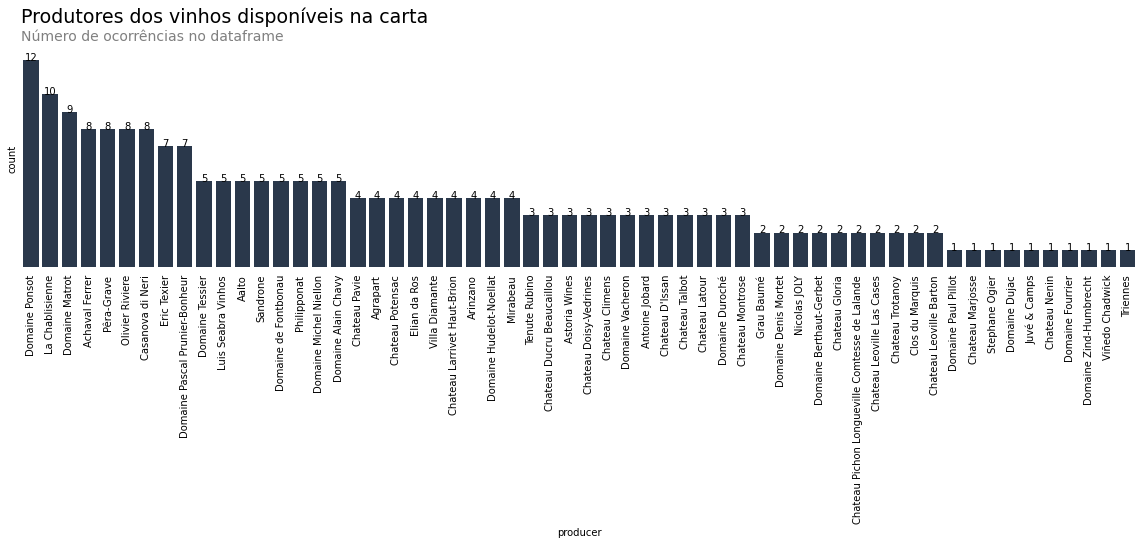

In [ ]:
# gerando o gráfico
f, ax = plt.subplots(figsize=(20, 4))
sns.countplot(x=df_products.producer, order=df_products.producer.value_counts().index, color = "#253750");
plt.xticks(rotation=90)

# adicionando os títulos
plt.title("Produtores dos vinhos disponíveis na carta", fontsize=19, x=0.0, y=1.1, loc="left")
plt.suptitle("Número de ocorrências no dataframe", color = "gray", fontsize=14, x=0.125, y=0.95, ha="left")

# colocando os rótulos
for retangulo in ax.patches:
  ax.text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height(),
          '{:,}'.format(int(retangulo.get_height())).replace(',','.'), # adicionando o texto da altura
          ha = 'center')

# definindo visibilidade de parâmetros
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True) 
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False) 
for pos in ['right', 'top', 'left', 'bottom']: 
    plt.gca().spines[pos].set_visible(False)

# plotado o gráfico
plt.show();

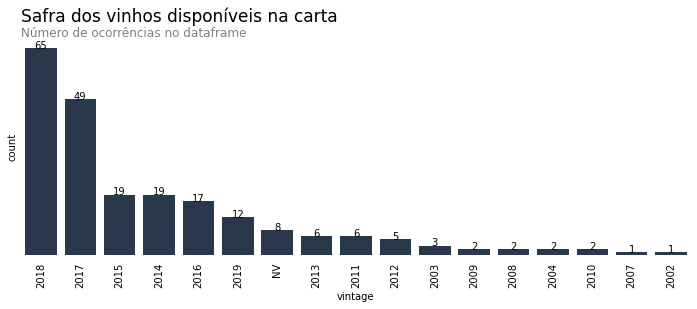

In [ ]:
# gerando o gráfico
f, ax = plt.subplots(figsize=(12, 4))
sns.countplot(x=df_products.vintage, order=df_products.vintage.value_counts().index, color = "#253750");
plt.xticks(rotation=90)

# adicionando os títulos
plt.title("Safra dos vinhos disponíveis na carta", fontsize=17, x=0.0, y=1.05, loc="left")
plt.suptitle("Número de ocorrências no dataframe", color = "gray", fontsize=12, x=0.125, y=0.92, ha="left")

# colocando os rótulos
for retangulo in ax.patches:
  ax.text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height(),
          '{:,}'.format(int(retangulo.get_height())).replace(',','.'), # adicionando o texto da altura
          ha = 'center')

# definindo visibilidade de parâmetros
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True) 
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False) 
for pos in ['right', 'top', 'left', 'bottom']: 
    plt.gca().spines[pos].set_visible(False)

# plotado o gráfico
plt.show();

É possível identificar que a maior quantidade de vinhos disponíveis são provenientes de anos mais recentes. Além disso, conseguimos verificar a necessidade de limpeza desta *feature*, pois temos um dado constando valor NV. Faremos isso na etapa de Limpeza dos dados deste estudo.

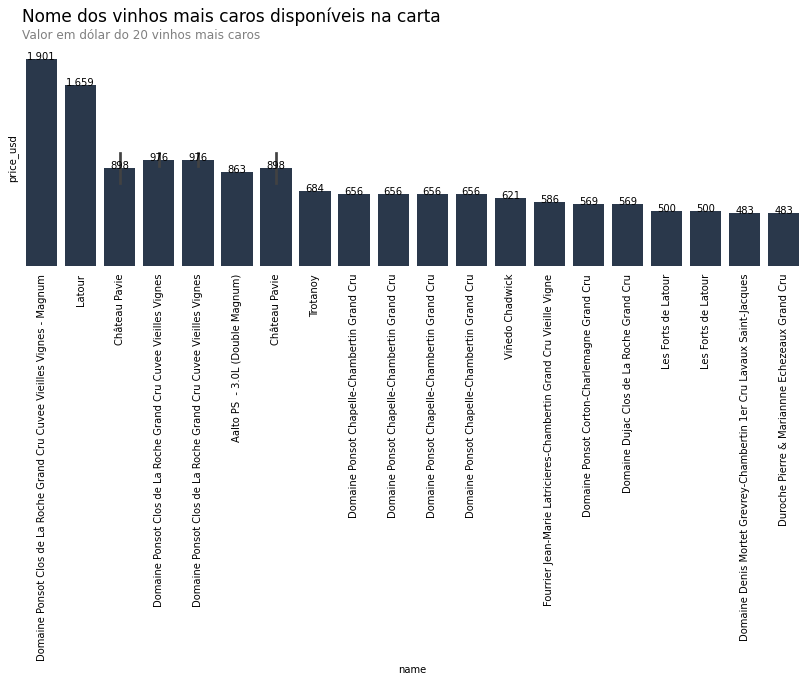

In [ ]:
# gerando o gráfico
f, ax = plt.subplots(figsize=(14, 4))
sns.barplot(x=df_products.name, y=df_products.price_usd, order=df_products.sort_values('price_usd', ascending=False).name.iloc[0:20], color = "#253750")
plt.xticks(rotation=90)

# adicionando os títulos
plt.title("Nome dos vinhos mais caros disponíveis na carta", fontsize=17, x=0.0, y=1.1, loc="left")
plt.suptitle("Valor em dólar do 20 vinhos mais caros", color = "gray", fontsize=12, x=0.125, y=0.95, ha="left")

# colocando os rótulos
for retangulo in ax.patches:
  ax.text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height(),
          '{:,}'.format(int(retangulo.get_height())).replace(',','.'), # adicionando o texto da altura
          ha = 'center')

# definindo visibilidade de parâmetros
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True) 
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False) 
for pos in ['right', 'top', 'left', 'bottom']: 
    plt.gca().spines[pos].set_visible(False)

# plotado o gráfico
plt.show();

Aqui conseguimos verificar que os dois vinhos mais caros estão com valores bem superiores aos demais.

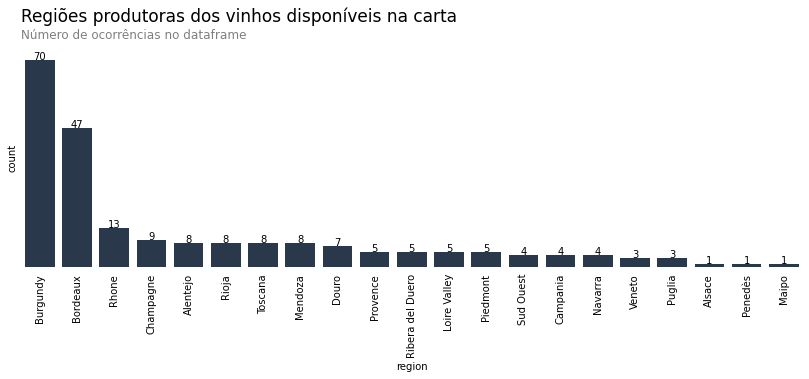

In [ ]:
# gerando o gráfico
f, ax = plt.subplots(figsize=(14, 4))
sns.countplot(x=df_products.region, order = df_products.region.value_counts().index, color = "#253750")
plt.xticks(rotation=90)

# adicionando os títulos
plt.title("Regiões produtoras dos vinhos disponíveis na carta", fontsize=17, x=0.0, y=1.1, loc="left")
plt.suptitle("Número de ocorrências no dataframe", color = "gray", fontsize=12, x=0.125, y=0.95, ha="left")

# colocando os rótulos
for retangulo in ax.patches:
  ax.text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height(),
          '{:,}'.format(int(retangulo.get_height())).replace(',','.'), # adicionando o texto da altura
          ha = 'center')

# definindo visibilidade de parâmetros
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True) 
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False) 
for pos in ['right', 'top', 'left', 'bottom']: 
    plt.gca().spines[pos].set_visible(False)

# plotado o gráfico
plt.show();

Aqui também podemos verificar que os dois maiores produtores se destacam pelo número bem superior aos demais disponíveis na carta de vinhos.

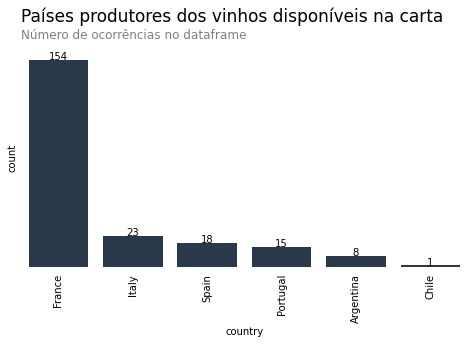

In [ ]:
# gerando o gráfico
f, ax = plt.subplots(figsize=(8, 4))
sns.countplot(x=df_products.country, order = df_products.country.value_counts().index, color = "#253750")
plt.xticks(rotation=90)

# adicionando os títulos
plt.title("Países produtores dos vinhos disponíveis na carta", fontsize=17, x=0.0, y=1.1, loc="left")
plt.suptitle("Número de ocorrências no dataframe", color = "gray", fontsize=12, x=0.125, y=0.95, ha="left")

# colocando os rótulos
for retangulo in ax.patches:
  ax.text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height(),
          '{:,}'.format(int(retangulo.get_height())).replace(',','.'), # adicionando o texto da altura
          ha = 'center')

# definindo visibilidade de parâmetros
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True) 
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False) 
for pos in ['right', 'top', 'left', 'bottom']: 
    plt.gca().spines[pos].set_visible(False)

# plotado o gráfico
plt.show();

Conforme podemos visualizar acima, a França é o maior produtor de vinhos disponíveis na carta de vinhos, apresentando uma quantidade bem superior aos demais.

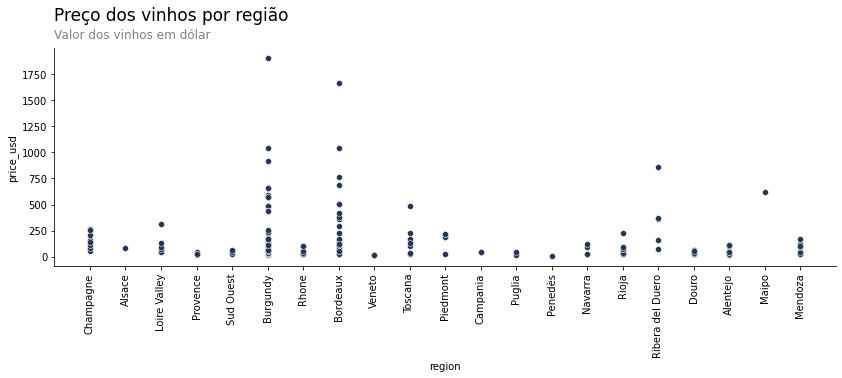

In [ ]:
# gerando o gráfico
f, ax = plt.subplots(figsize=(14, 4))
sns.scatterplot(x=df_products.region, y=df_products.price_usd, color = "#253750")
plt.xticks(rotation=90)

# adicionando os títulos
plt.title("Preço dos vinhos por região", fontsize=17, x=0.0, y=1.1, loc="left")
plt.suptitle("Valor dos vinhos em dólar", color = "gray", fontsize=12, x=0.125, y=0.95, ha="left")

# colocando os rótulos
for retangulo in ax.patches:
  ax.text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height(),
          '{:,}'.format(int(retangulo.get_height())).replace(',','.'), # adicionando o texto da altura
          ha = 'center')

# definindo visibilidade de parâmetros
for pos in ['right', 'top']: 
     plt.gca().spines[pos].set_visible(False)

# plotado o gráfico
plt.show();

As duas regiões como os maiores preços de vinho são `Burgundy` e `Bordeaux`, duas regiões produtoras de vinhos na França que são bem conhecidas pela boa qualidade de seus vinhos.

###**Balanceamento: Vendas**

 Quanto aos dados do *dataframe* de vendas, podemos tirar os seguintes insights:

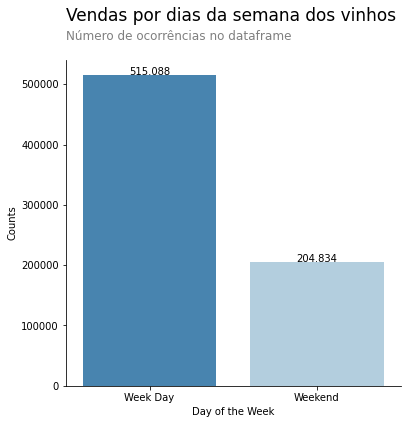

In [ ]:
# gerando o gráfico
weekend_counts = df_sales.Weekend.value_counts().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(6,6))
sns.barplot(weekend_counts.index, weekend_counts.values, palette="Blues_r")

# adicionando os labels
plt.ylabel("Counts")
plt.xlabel("Day of the Week")
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = 'Weekend'
labels[0] = 'Week Day'
ax.set_xticklabels(labels)

# adicionando os títulos
plt.title("Vendas por dias da semana dos vinhos", fontsize=17, x=0.0, y=1.1, loc="left")
plt.suptitle("Número de ocorrências no dataframe", color = "gray", fontsize=12, x=0.125, y=0.95, ha="left")

# colocando os rótulos
for retangulo in ax.patches:
  ax.text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height(),
          '{:,}'.format(int(retangulo.get_height())).replace(',','.'), # adicionando o texto da altura
          ha = 'center')

# definindo visibilidade de parâmetros
for pos in ['right', 'top']: 
     plt.gca().spines[pos].set_visible(False)
     
# plotado o gráfico
plt.show()

Outras análises importantes a serem feitas em relação aos dados de vendas são os valores monetários, além das quantidades vendidas. Por conta disso elaborei os seguintes gráficos:

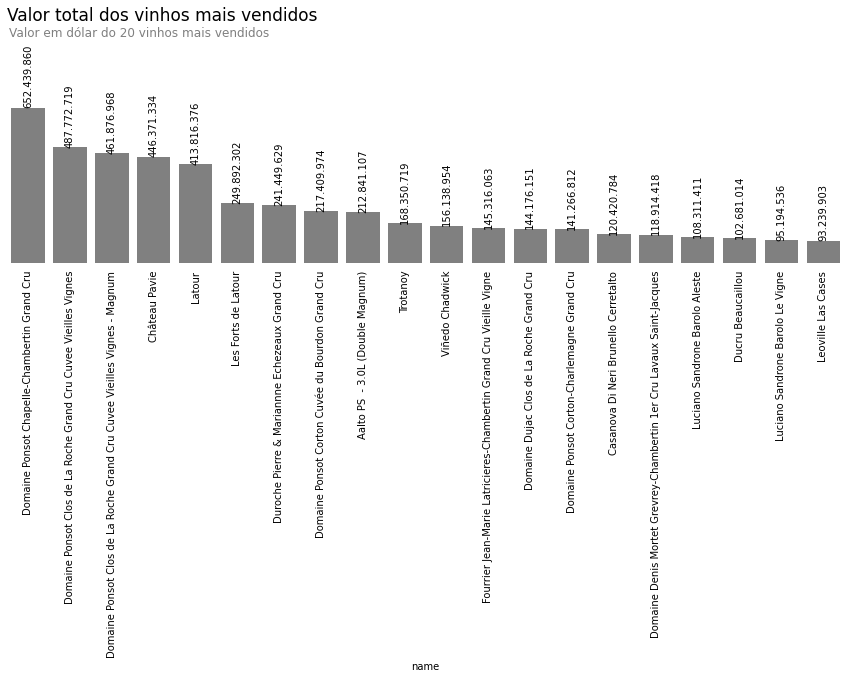

In [ ]:
# gerando o gráfico
fig, ax = plt.subplots(figsize=(15,3))
top_wines = df_sales.groupby('name')['amount_spent'].sum().sort_values(ascending=False).iloc[0:20]
sns.barplot(x=top_wines.index, y=top_wines.values, color ="gray")
ax.tick_params(labelrotation=90)

# ajustando a escala do eixo y
plt.ticklabel_format(style='plain', axis='y')

# adicionando os títulos
plt.title("Valor total dos vinhos mais vendidos", fontsize=17, x=0.0, y=1.45, loc="left")
plt.suptitle("Valor em dólar do 20 vinhos mais vendidos", color = "gray", fontsize=12, x=0.127, y=1.22, ha="left")

# colocando os rótulos
for retangulo in ax.patches:
  ax.text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height(),
          '{:,}'.format(int(retangulo.get_height())).replace(',','.'), # adicionando o texto da altura
          ha = 'center', verticalalignment = 'bottom', rotation=90)

# definindo visibilidade de parâmetros
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True) 
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False) 
for pos in ['right', 'top', 'left', 'bottom']: 
    plt.gca().spines[pos].set_visible(False)

# plotado o gráfico
plt.show()

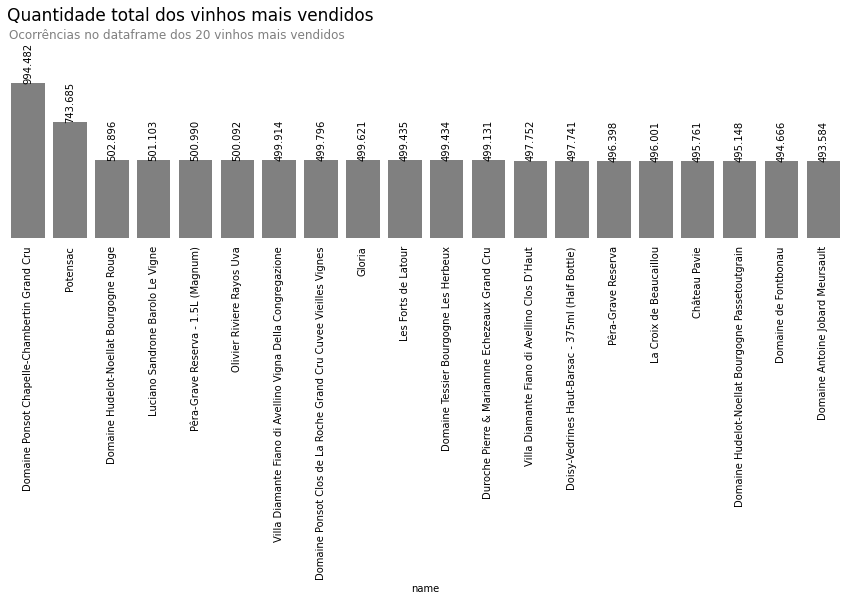

In [ ]:
# gerando o gráfico
fig, ax = plt.subplots(figsize=(15,3))
top_sales = df_sales.groupby('name')['sales'].sum().sort_values(ascending=False).iloc[0:20]
sns.barplot(x=top_sales.index, y=top_sales.values, color="gray")
plt.xticks(rotation=90)
ax.tick_params(labelrotation=90)

# ajustando a escala do eixo y
plt.ticklabel_format(style='plain', axis='y')

# adicionando os títulos
plt.title("Quantidade total dos vinhos mais vendidos", fontsize=17, x=0.0, y=1.3, loc="left")
plt.suptitle("Ocorrências no dataframe dos 20 vinhos mais vendidos", color = "gray", fontsize=12, x=0.127, y=1.1, ha="left")

# colocando os rótulos
for retangulo in ax.patches:
  ax.text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height(),
          '{:,}'.format(int(retangulo.get_height())).replace(',','.'), # adicionando o texto da altura
          ha = 'center', verticalalignment = 'bottom',rotation=90)

# definindo visibilidade de parâmetros
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True) 
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False) 
for pos in ['right', 'top', 'left', 'bottom']: 
    plt.gca().spines[pos].set_visible(False)

# plotado o gráfico
plt.show()

Aqui temos um efeito muito interessante, em que o nosso vinho que mais traz receita também é o mais caro. Mas o segundo que mais gera faturamento é o **oitavo** em volume de vendas!

Se olharmos os vinhos do Domaine Ponsot vamos reparar preços bem elevados. Na verdade, são os vinhos mais caros da carta.

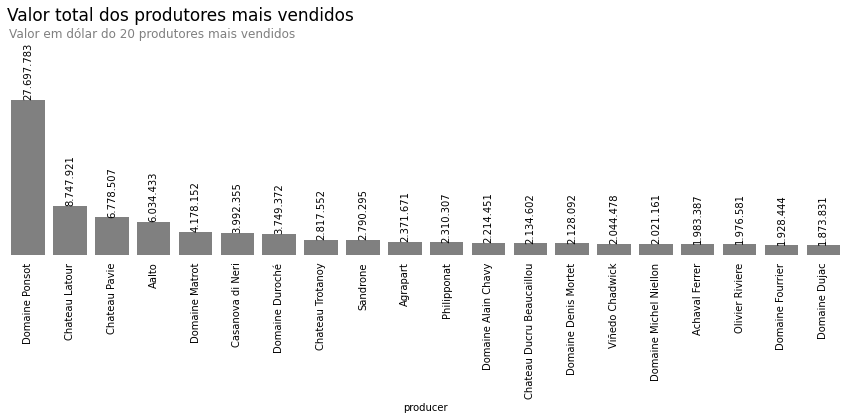

In [ ]:
# gerando o gráfico
fig, ax = plt.subplots(figsize=(15,3))
top_sales = df_sales.groupby('producer')['price_usd'].sum().sort_values(ascending=False).iloc[0:20]
sns.barplot(x=top_sales.index, y=top_sales.values, color="gray")
plt.xticks(rotation=90)
ax.tick_params(labelrotation=90)

# ajustando a escala do eixo y
plt.ticklabel_format(style='plain', axis='y')

# adicionando os títulos
plt.title("Valor total dos produtores mais vendidos", fontsize=17, x=0.0, y=1.4, loc="left")
plt.suptitle("Valor em dólar do 20 produtores mais vendidos", color = "gray", fontsize=12, x=0.127, y=1.18, ha="left")

# colocando os rótulos
for retangulo in ax.patches:
  ax.text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height(),
          '{:,}'.format(int(retangulo.get_height())).replace(',','.'), # adicionando o texto da altura
          ha = 'center', verticalalignment = 'bottom',rotation=90)

# definindo visibilidade de parâmetros
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True) 
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False) 
for pos in ['right', 'top', 'left', 'bottom']: 
    plt.gca().spines[pos].set_visible(False)

# plotado o gráfico
plt.show()

Com essa análise exploratória conseguimos tirar diversos insights relacionados aos dados dos produtos disponíveis neste estudo. Agora podemos analisar os dados relacionados às vendas das lojas especializadas em vinhos.

###**Distribuições**

Por fim, veremos a distribuição das classes dos *dataframes* para identificar se os nossos dados podem estar com algum tipo de bias (viés) e tirar alguns insights do negócio. É possível ver abaixio, pelo método `describe`, que não há indícios da presença de outliers.

In [ ]:
# gerando dados numéricos de produtos
df_products.describe()

,vintage,price_brl,price_usd
count,219.000000,219.000000,219.000000
mean,1942.182648,967.617352,167.407808
std,379.055337,1409.588217,243.873780
min,0.000000,52.800000,9.130000
25%,2014.000000,264.300000,45.725000
50%,2017.000000,509.400000,88.130000
75%,2018.000000,949.200000,164.220000
max,2019.000000,10992.000000,1901.730000


In [ ]:
# gerando dados numéricos de vendas
df_sales.describe()

,vintage,price_brl,price_usd,store,sales,amount_spent,Year,Quarter,Month,Week,Weekday,Day,Dayofyear,Weekend
count,719922.000000,719922.000000,719922.000000,719922.000000,719922.000000,719922.000000,719922.000000,719922.000000,719922.00000,719922.000000,719922.000000,719922.000000,719922.000000,719922.000000
mean,1942.200880,967.694764,167.421201,2.000000,70.593405,12138.102539,2019.000704,2.508526,6.52284,26.600382,2.994108,15.729900,183.192633,0.284522
std,378.144072,1406.492071,243.338114,0.816497,41.357854,22349.797865,0.816641,1.117092,3.44873,15.065344,1.999536,8.800209,105.458853,0.451187
min,0.000000,52.800000,9.130000,1.000000,1.000000,9.130000,2018.000000,1.000000,1.00000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,2014.000000,259.200000,44.840000,1.000000,35.000000,2253.790000,2018.000000,2.000000,4.00000,14.000000,1.000000,8.000000,92.000000,0.000000
50%,2017.000000,509.400000,88.130000,2.000000,67.000000,5051.260000,2019.000000,3.000000,7.00000,27.000000,3.000000,16.000000,183.000000,0.000000
75%,2018.000000,949.200000,164.220000,3.000000,104.000000,11428.300000,2020.000000,4.000000,10.00000,40.000000,5.000000,23.000000,275.000000,1.000000
max,2019.000000,10992.000000,1901.730000,3.000000,196.000000,285259.500000,2020.000000,4.000000,12.00000,53.000000,6.000000,31.000000,366.000000,1.000000


Analisando o boxplot para a *feature* `price_usd` e `vintage` do *dataframe* de produtos podemos ver a distribuição de valores por safra de vinhos.

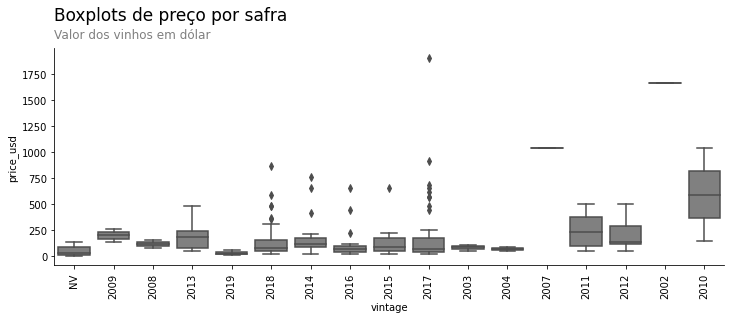

In [ ]:
# boxplots de preço por safra
data = pd.concat([df_products.price_usd, df_products.vintage], axis=1)
f, ax = plt.subplots(figsize=(12, 4))
fig = sns.boxplot(x=df_products.vintage, y=df_products.price_usd, data=data, color = "gray")
fig.axis();
plt.xticks(rotation=90)

# adicionando os títulos
plt.title("Boxplots de preço por safra", fontsize=17, x=0.0, y=1.1, loc="left")
plt.suptitle("Valor dos vinhos em dólar", color = "gray", fontsize=12, x=0.125, y=0.95, ha="left")

#colocando os rótulos
for retangulo in ax.patches:
  ax.text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height(),
          '{:,}'.format(int(retangulo.get_height())).replace(',','.'), # adicionando o texto da altura
          ha = 'center')

# definindo visibilidade de parâmetros
for pos in ['right', 'top']: 
     plt.gca().spines[pos].set_visible(False);

# Modelos de Machine Learning

Com os dados formatados e analisados, vamos começar a fazer as previsões. Conforme descrito inicialmente, vamos iniciar o Time Series Forecasting com o teste ADF.

## Teste ADF

Diferente de alguns projetos que vemos com o Prophet, vamos fazer o teste para descobrir se nossa série é estacionária. O teste utilizado será o ***Augmented Dickey Fuller (ADF)***.

O ADF é um dos testes estatísticos mais usados para TS. Suas hipóteses nula e alternativa são:

* A Hipótese Nula ($H_0$) do teste é que a TS **não é estacionária**. Ou seja, possui algum tipo de dependência em relação ao tempo.
* A Hipótese Alternativa ($H_1$) **rejeita a hipótese nula**, ou seja, que a TS **é estacionária**.

Vamos ver como isso vai acontecer no nosso projeto específico:

In [ ]:
# extraindo os valores
X = df_ts.y

# aplicando o ADF e imprimindo os resultados.
result = adfuller(X)
print('Augmented Dickey–Fuller')
print('Statistical Test: {:.4f}'.format(result[0]))
print('P Value: {:.10f}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
	print('\t{}: {:.4f}'.format(key, value))

Augmented Dickey–Fuller
Statistical Test: -2.3601
P Value: 0.1533303754
Critical Values:
	1%: -3.4365
	5%: -2.8642
	10%: -2.5682


> Normalmente, rejeitamos $H_0$ quando o *p-value* é menor ou igual a um determinado nível de significância. Normalmente, esse nível de significância é igual a 0.01 (1%), 0.05 (5%) ou até mesmo 0.1 (10%).

> Quanto menor o *p-value*, mais evidências contra a hipótese nula você tem. Por exemplo, caso seja usado $\text{p-value} = 0.05$, rejeitamos a $H_0$ com um nível de confiança de 95%. 

> Caso o valor do teste fique acima do *threshold*, falharemos em rejeitar a hipótese nula. **Atenção, isso não significa que $H_0$ é verdadeira.** Significa apenas que o experimento não encontrou evidências para rejeitá-la.

Com um `P Value` de 0.154, poderíamos rejeitar a hipótese nula com um nível de confiança na casa de 85%. Vamos utilizar esse conjunto como está para a nossa baseline, e caso os resultados não sejam bons o suficiente, vamos fazer as transformações.

## Tamanho das Previsões

Ao lidar com previsões em Séries Temporais precisamos entender que quanto maior o período que estamos tentando prever, menos confiança teremos nos resultados. Dessa forma, mesmo tendo anos de registros de vendas, vamos fazer as nossas previsões para um período de 30 dias.

In [ ]:
# definindo o tamanho da previsão para trinta dias
prediction_size = 30
train_df = df_ts[:-prediction_size]

Agora que temos o nosso conjunto de teste, vamos instanciar e treinar nosso modelo, e fazer nossas previsões.

In [ ]:
# instantiando o  modelo
b = Prophet()

# trainando o modelo
b.fit(train_df)

# fazendo as previsões
future = b.make_future_dataframe(periods=prediction_size)
forecast = b.predict(future)

# gerado os dados
forecast.head()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_hi0e0dh/xgjv9zav.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_hi0e0dh/_y83rj84.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24044', 'data', 'file=/tmp/tmp_hi0e0dh/xgjv9zav.json', 'init=/tmp/tmp_hi0e0dh/_y83rj84.json', 'output', 'file=/tmp/tmp_hi0e0dh/prophet_model6ui4mod0/prophet_model-20221208174828.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:48:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:48:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,45476.503353,40889.838297,44019.008844,45476.503353,45476.503353,-3078.445370,-3078.445370,-3078.445370,-899.823487,-899.823487,-899.823487,-2178.621883,-2178.621883,-2178.621883,0.0,0.0,0.0,42398.057983
1,2018-01-02,45475.725688,41080.159035,44198.758825,45475.725688,45475.725688,-2795.275090,-2795.275090,-2795.275090,-616.580227,-616.580227,-616.580227,-2178.694863,-2178.694863,-2178.694863,0.0,0.0,0.0,42680.450599
2,2018-01-03,45474.948024,41410.086416,44565.651251,45474.948024,45474.948024,-2455.691157,-2455.691157,-2455.691157,-275.723553,-275.723553,-275.723553,-2179.967604,-2179.967604,-2179.967604,0.0,0.0,0.0,43019.256867
3,2018-01-04,45474.170359,41933.362153,44980.703429,45474.170359,45474.170359,-1976.030591,-1976.030591,-1976.030591,206.221323,206.221323,206.221323,-2182.251915,-2182.251915,-2182.251915,0.0,0.0,0.0,43498.139768
4,2018-01-05,45473.392695,42620.761814,45658.467013,45473.392695,45473.392695,-1334.297864,-1334.297864,-1334.297864,851.031241,851.031241,851.031241,-2185.329105,-2185.329105,-2185.329105,0.0,0.0,0.0,44139.094831


O Prophet traz em seu resultado de previsões diversas informações, entre elas temos o `yhat`, que são nossas previsões. Além disso temos também os limites inferiores e superiores (`yhat_lower`, `yhat_upper`, respectivamente) entre outras informações que podem ser úteis para um projeto real.

Visualizar as previsões também é super fácil, como podemos ver abaixo:

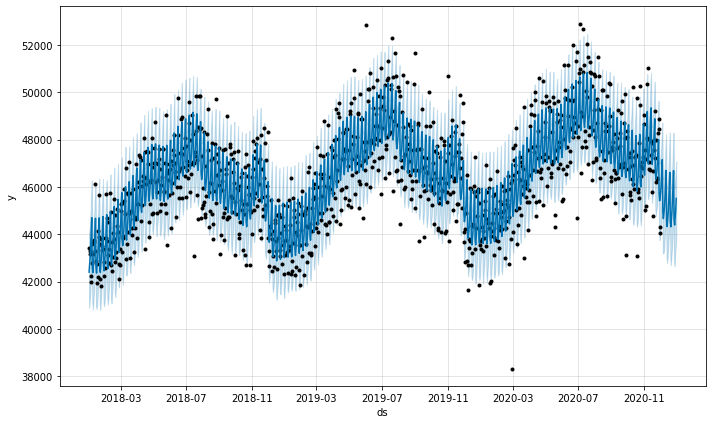

In [ ]:
# plotando as previsões
b.plot(forecast).savefig('forecast_non_stationary.png')

Além disso, também podemos plotar os componentes da nossa previsão.

Abaixo, podemos ver:

* Tendência Geral
* Tendência Semanal
* Tendência Anual


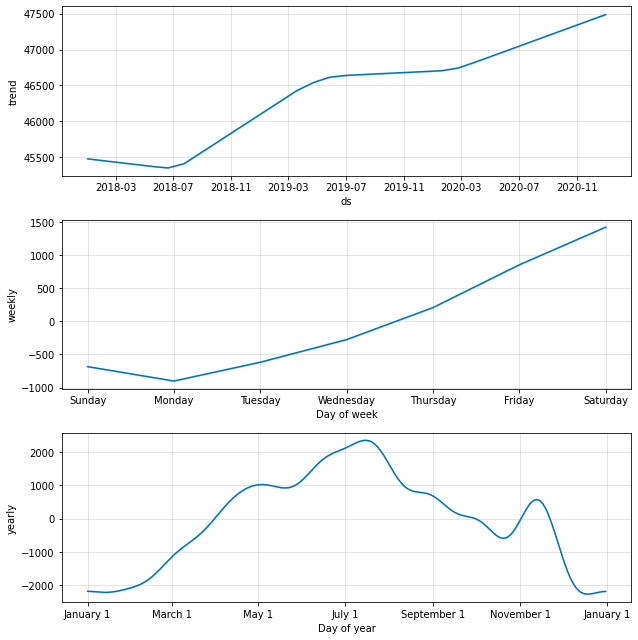

In [ ]:
# plotando componentes
b.plot_components(forecast).savefig('non_st_components.png')

## Modelo: Série Não-Estacionária
Tudo isso parece lindo e perfeito, mas como saber se nossas previsões estão boas de verdade?

Para isso utilizaremos as seguintes métricas:

* Mean Absolute Percentage Error (MAPE) - Mostra quanto as nossas previsões diferem do valor real em porcentagem.
* Mean Absolute Error (MAE) - Valor absoluto do nosso erro na previsão em relação à série real.

Abaixo temos uma função para calcular o MAPE e MAE da nossa série.

In [ ]:
# definindo a função
def make_comparison_dataframe(historical, forecast):
  return forecast.set_index('ds')[['yhat', 'yhat_lower',
                                'yhat_upper']].join(historical.set_index('ds'))
cmp_df = make_comparison_dataframe(df_ts, forecast)

def calculate_forecast_errors(df_ts, prediction_size):

  df = df_ts.copy()
  df['e'] = df['y'] - df['yhat']
  df['p'] = 100 * df['e'] / df['y']
  predicted_part = df[-prediction_size:]

  error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))

  return{'MAPE': error_mean('p'), 'MAE': error_mean('e')}

# imprimindo o MAPE e MAE
for err_name, err_value in calculate_forecast_errors(cmp_df, prediction_size).items():
  print(err_name, err_value)

MAPE 2.262039011989295
MAE 1005.9748992734104


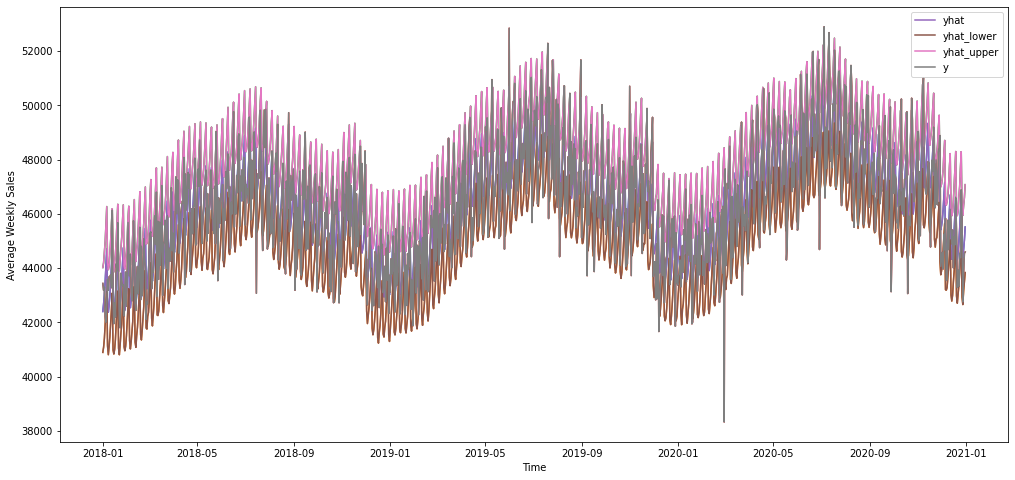

In [ ]:
# visualizando os resultados
fig, ax = plt.subplots(figsize=(17,8))

plt.plot(cmp_df['yhat'])
plt.plot(cmp_df['yhat_lower'])
plt.plot(cmp_df['yhat_upper'])
plt.plot(cmp_df['y'])

plt.xlabel('Time')
plt.ylabel('Average Weekly Sales')
ax.plot(cmp_df['yhat'], label='yhat')
ax.plot(cmp_df['yhat_lower'], label='yhat_lower')
ax.plot(cmp_df['yhat_upper'], label='yhat_upper')
ax.plot(cmp_df['y'], label='y')
ax.legend()
plt.savefig('non_st_yhat.png')
plt.show()

Esses resultados podem parecer bons, mas estamos tendo um erro absoluto grande dentro do contexto que estamos lidando.

Esse modelo vai servir bem como baseline. Agora, vamos transformar a série em estacionária e rodar novamente!

## Modelo: Série Estacionária

Agora vamos transformar a série em estacionária.

> Para transformar uma TS em estacionária, precisamos remover a tendência e a sazonalidade que há nos dados originais. Para isso, existem diversas técnicas que podem ser usadas.

> Um bom começo é aplicar o $log$ a fim de reduzirmos a magnitude dos valores da TS. Na sequência, subtraímos a média móvel de um determinado período em relação ao $log$ da TS.

In [ ]:
# preparando os dados
df_ts.index = pd.to_datetime(df_ts['ds'], format="%Y-%m-%d")
df_ts.drop('ds', axis=1, inplace=True)
df_ts.head()

,y
ds,
2018-01-01,43432
2018-01-02,43181
2018-01-03,43298
2018-01-04,42216
2018-01-05,42001


Primeiramente vamos verificar o plot com os dados sem o log:

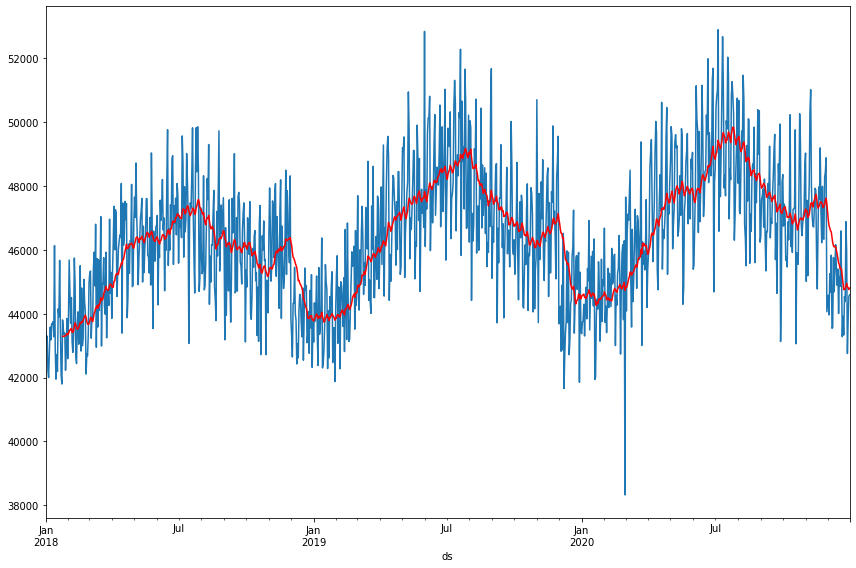

In [ ]:
# checando o plot original
ma = df_ts.rolling(24).mean()
fig, ax = plt.subplots(figsize=(12,8))
df_ts.plot(ax=ax, legend=False)
ma.plot(ax=ax, color='r', legend=False)
plt.tight_layout();

Agora vamos verificar o plot dos dados com o log:

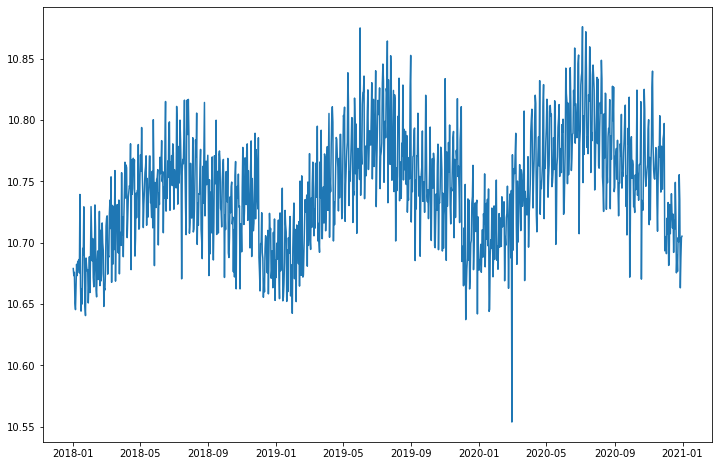

In [ ]:
# aplicando o log
fig, ax = plt.subplots(figsize=(12,8))
ts_log = np.log(df_ts)
plt.plot(ts_log);

Agora vamos verificar o plot dos dados com o log e a média:

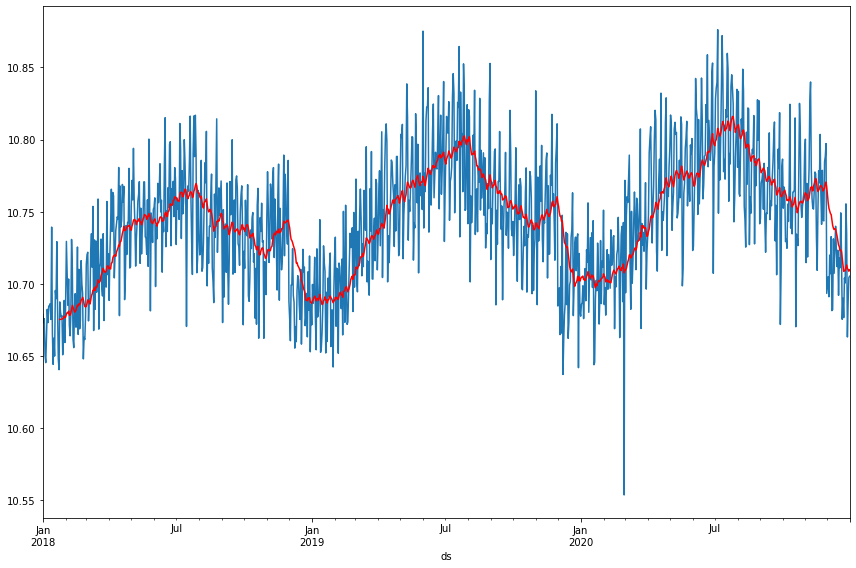

In [ ]:
# aplicando o log
df_log = np.log(df_ts)
ma_log = df_log.rolling(24).mean()

fig, ax = plt.subplots(figsize=(12,8))
df_log.plot(ax=ax, legend=False)
ma_log.plot(ax=ax, color='r', legend=False)
plt.tight_layout()

Agora subtraímos a média móvel de um determinado período em relação ao log  da TS.

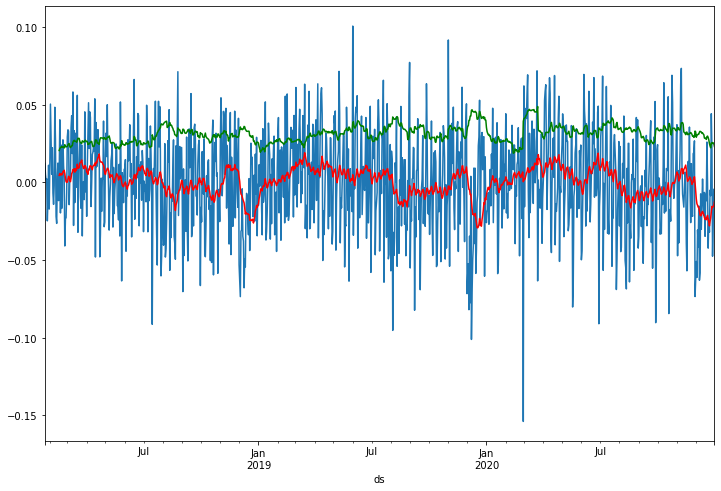

In [ ]:
# subtraindo a média do log nos dados
df_sub = (df_log - ma_log).dropna()
ma_sub = df_sub.rolling(24).mean()
std_sub = df_sub.rolling(24).std()

fig, ax = plt.subplots(figsize=(12,8))
df_sub.plot(ax=ax, legend=False)
ma_sub.plot(ax=ax, color='r', legend=False)
std_sub.plot(ax=ax, color='g', legend=False)
plt.show();

In [ ]:
# repetindo o ADF
X_sub = df_sub.y.values

# aplicando o ADF e imprimindo os resultados
result_sub = adfuller(X_sub)
print('Augmented Dickey–Fuller')
print('Statistical Test: {:.4f}'.format(result_sub[0]))
print('P Value: {:.10f}'.format(result_sub[1]))
print('Critical Values:')
for key, value in result_sub[4].items():
	print('\t{}: {:.4f}'.format(key, value))

Augmented Dickey–Fuller
Statistical Test: -5.6436
P Value: 0.0000010231
Critical Values:
	1%: -3.4366
	5%: -2.8643
	10%: -2.5682


Agora temos uma comprovação com nível de confiança bem mais alto para considerar a nossa série estacionária.

Existe outra técnica que podemos utilizar para potencializar esses resultados que é a diferenciação.

**Diferenciação**

Uma outra técnica simples que ajuda a tornar a TS mais estacionária é a diferenciação.

Apenas calculando a diferença entre duas observações possíveis, é possível incrementar ainda mais o desempenho no ADF.

$$value(t) = observation(t) - observation(t -1)$$

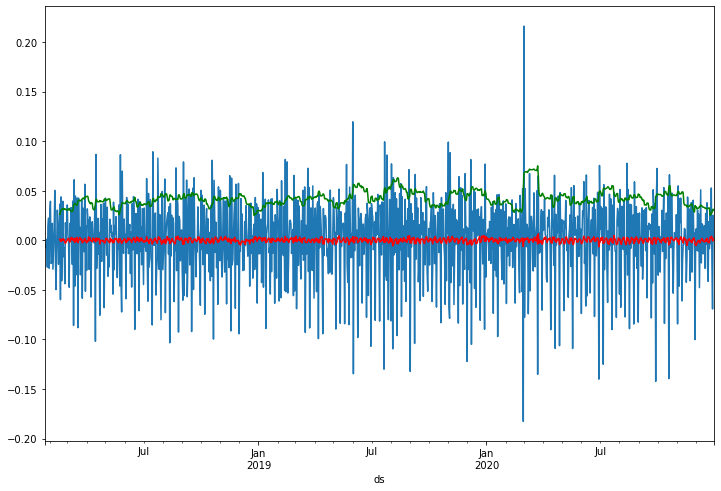

Augmented Dickey–Fuller
Statistical Test: -5.6436
P Value: 0.0000010231
Critical Values:
	1%: -3.4366
	5%: -2.8643
	10%: -2.5682


In [ ]:
# aplicando a diferenciação
df_diff = df_sub.diff(1)
ma_diff = df_diff.rolling(24).mean()
std_diff = df_diff.rolling(24).std()

fig, ax = plt.subplots(figsize=(12,8))
df_diff.plot(ax=ax, legend=False)
ma_diff.plot(ax=ax, color='r', legend=False)
std_diff.plot(ax=ax, color='g', legend=False)
plt.show()

# extraindo os valores
X_diff = df_diff.y.dropna().values

# aplicando o ADF e imprimindo os resultados 
result_diff = adfuller(X_diff)
print('Augmented Dickey–Fuller')
print('Statistical Test: {:.4f}'.format(result_sub[0]))
print('P Value: {:.10f}'.format(result_sub[1]))
print('Critical Values:')
for key, value in result_sub[4].items():
	print('\t{}: {:.4f}'.format(key, value))

Em nosso caso, não tivemos modificações, mas achei interessante trazer este tópico, caso precisássemos disso no projeto.

De qualquer forma, vamos seguir. O primeiro passo é retomar o formato que o Prophet precisa.

In [ ]:
# transformando no formato do Prophet
df_log.reset_index(inplace=True)

In [ ]:
# definindo o tamanho da previsão
prediction_size = 30
train_df = df_log[:-prediction_size]

In [ ]:
# instanciando o modelo
m = Prophet()

# treinando o modelo
m.fit(train_df)

# fazendo previsões
future = m.make_future_dataframe(periods=prediction_size)
forecast = m.predict(future)

# gerando os dados
forecast.head()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_hi0e0dh/n68nhhey.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_hi0e0dh/4bf7kwyc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15200', 'data', 'file=/tmp/tmp_hi0e0dh/n68nhhey.json', 'init=/tmp/tmp_hi0e0dh/4bf7kwyc.json', 'output', 'file=/tmp/tmp_hi0e0dh/prophet_modeleu1qdqup/prophet_model-20221208180201.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:02:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:02:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,10.727315,10.626923,10.693411,10.727315,10.727315,-0.068102,-0.068102,-0.068102,-0.019148,-0.019148,-0.019148,-0.048954,-0.048954,-0.048954,0.0,0.0,0.0,10.659213
1,2018-01-02,10.727281,10.631570,10.698780,10.727281,10.727281,-0.062022,-0.062022,-0.062022,-0.012998,-0.012998,-0.012998,-0.049024,-0.049024,-0.049024,0.0,0.0,0.0,10.665259
2,2018-01-03,10.727247,10.642009,10.707833,10.727247,10.727247,-0.054717,-0.054717,-0.054717,-0.005592,-0.005592,-0.005592,-0.049125,-0.049125,-0.049125,0.0,0.0,0.0,10.672530
3,2018-01-04,10.727213,10.649248,10.718473,10.727213,10.727213,-0.044465,-0.044465,-0.044465,0.004786,0.004786,0.004786,-0.049250,-0.049250,-0.049250,0.0,0.0,0.0,10.682748
4,2018-01-05,10.727179,10.661533,10.729574,10.727179,10.727179,-0.031122,-0.031122,-0.031122,0.018272,0.018272,0.018272,-0.049394,-0.049394,-0.049394,0.0,0.0,0.0,10.696057


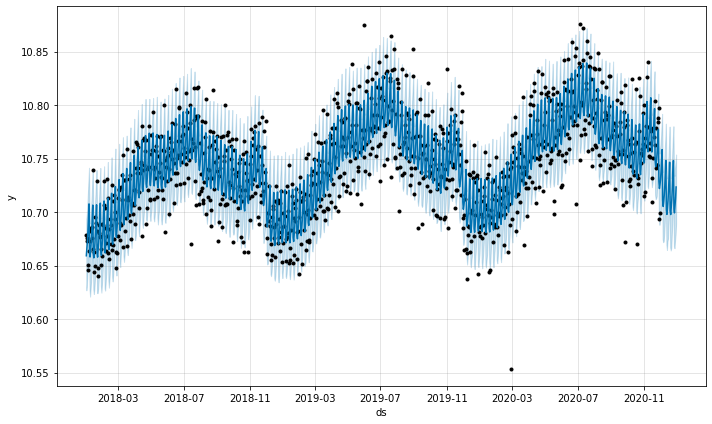

In [ ]:
# plotando a previsão
m.plot(forecast).savefig('st_forecast.png')

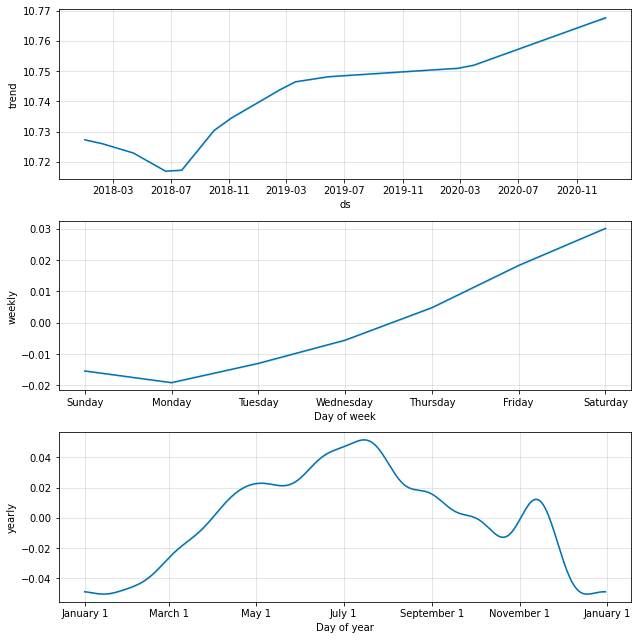

In [ ]:
# plotando os componentes
m.plot_components(forecast).savefig('st_components.png')

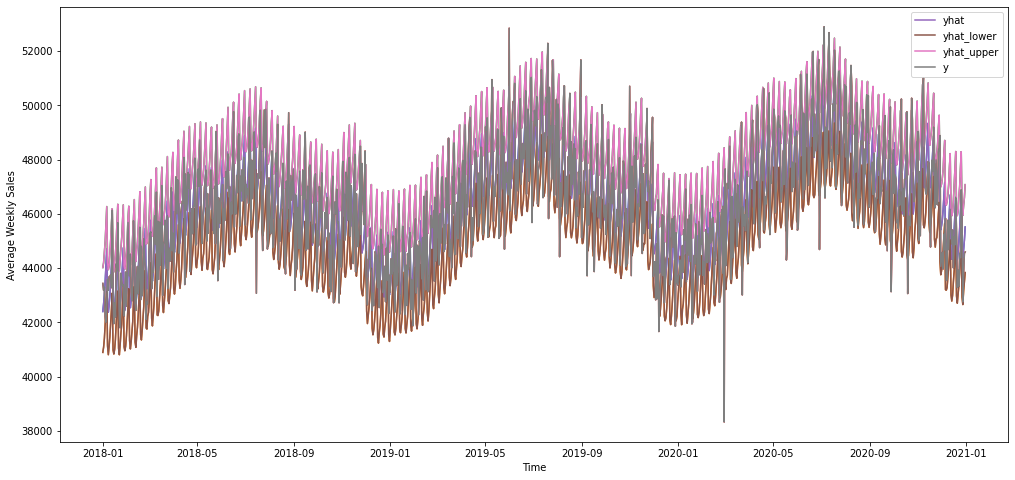

In [ ]:
# checando os resultados
fig, ax = plt.subplots(figsize=(17,8))

plt.plot(cmp_df['yhat'])
plt.plot(cmp_df['yhat_lower'])
plt.plot(cmp_df['yhat_upper'])
plt.plot(cmp_df['y'])

plt.xlabel('Time')
plt.ylabel('Average Weekly Sales')
ax.plot(cmp_df['yhat'], label='yhat')
ax.plot(cmp_df['yhat_lower'], label='yhat_lower')
ax.plot(cmp_df['yhat_upper'], label='yhat_upper')
ax.plot(cmp_df['y'], label='y')
ax.legend()
plt.show()

In [ ]:
# reutilizando a função
def make_comparison_dataframe(historical, forecast):
  return forecast.set_index('ds')[['yhat', 'yhat_lower',
                                'yhat_upper']].join(historical.set_index('ds'))
cmp_df = make_comparison_dataframe(df_log, forecast)

# calculando MAPE e MAE
def calculate_forecast_errors(df_ts, prediction_size):

  df = df_ts.copy()
  df['e'] = df['y'] - df['yhat']
  df['p'] = 100 * df['e'] / df['y']
  predicted_part = df[-prediction_size:]

  error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))

  return{'MAPE': error_mean('p'), 'MAE': error_mean('e')}

# imprimindo o MAPE e MAE
for err_name, err_value in calculate_forecast_errors(cmp_df, prediction_size).items():
  print(err_name, err_value)

MAPE 0.20201506244260833
MAE 0.02162259572808054


# Finalizando o modelo: Série Estacionária

Agora sim, temos um resultado bastante convincente!

Com erro bastante baixo, temos resultados muito bons para apresentar! Só temos um detalhe pra consertar.

Ao fazer a transformação para a série estacionária, colocamos os dados em uma outra escala, e precisamos trazê-los para valores condizentes com o data set original.

Como fizemos uma transformação com log, vamos trazer de volta com uma transformação de exponencial.

In [ ]:
# criando um dataframe completo
df_final = forecast[['ds', 'yhat']]
df_final.head()

,ds,yhat
0,2018-01-01,10.659213
1,2018-01-02,10.665259
2,2018-01-03,10.672530
3,2018-01-04,10.682748
4,2018-01-05,10.696057


In [ ]:
# visualizando as previsões em tabela
df_final['AmountSpentLog'] = df_log['y']
df_final.head()

<ipython-input-208-452ae92dfa7b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['AmountSpentLog'] = df_log['y']


,ds,yhat,AmountSpentLog
0,2018-01-01,10.659213,10.678952
1,2018-01-02,10.665259,10.673156
2,2018-01-03,10.672530,10.675862
3,2018-01-04,10.682748,10.650555
4,2018-01-05,10.696057,10.645449


Agora vamos criar um dataset que contenha:

* Data (`ds`)
* Previsão do Prophet (`yhat`)
* Valor Gasto Real (`AmountSpent`)
* Valor Gasto Previsto na escala correta (`AmountSpentPred`)

In [ ]:
# gerando o dataset com valores na escala original
df_final['AmountSpent'] = np.exp(df_final['AmountSpentLog'].values)
df_final['AmountSpentPred'] = np.exp(df_final['yhat'].values)
df_final.head(10)

<ipython-input-209-bcea7ca4bbce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['AmountSpent'] = np.exp(df_final['AmountSpentLog'].values)
<ipython-input-209-bcea7ca4bbce>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['AmountSpentPred'] = np.exp(df_final['yhat'].values)


,ds,yhat,AmountSpentLog,AmountSpent,AmountSpentPred
0,2018-01-01,10.659213,10.678952,43432.0,42583.124451
1,2018-01-02,10.665259,10.673156,43181.0,42841.360969
2,2018-01-03,10.672530,10.675862,43298.0,43153.974626
3,2018-01-04,10.682748,10.650555,42216.0,43597.202286
4,2018-01-05,10.696057,10.645449,42001.0,44181.283220
5,2018-01-06,10.707689,10.663522,42767.0,44698.210104
6,2018-01-07,10.661986,10.682400,43582.0,42701.349479
7,2018-01-08,10.658057,10.673179,43182.0,42533.919457
8,2018-01-09,10.664023,10.684646,43680.0,42788.408185
9,2018-01-10,10.671257,10.684783,43686.0,43099.075386


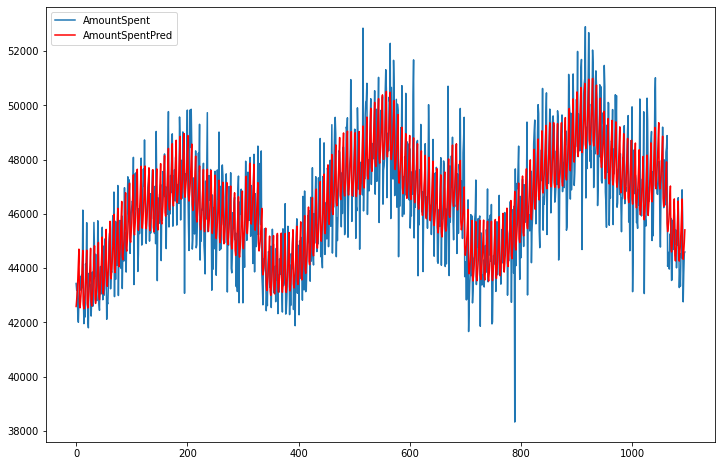

In [ ]:
# plotando as previsões e os dados reais
fig, ax = plt.subplots(figsize=(12,8))
df_final['AmountSpent'].plot(ax=ax, legend=('Amount Spent'))
df_final['AmountSpentPred'].plot(ax=ax, color='r', legend={'Predicted'})
plt.savefig('st_yhat.png')
plt.show()

Conforme podemos ver no gráfico acima, o nosso modelo está mais próximo dos limites superiores que dos inferiores, mas em geral, em um ponto médio.

Para visualizar previsões mais otimistas, poderíamos considerar o `yhat_upper`, e para previsões mais pessimistas, o `yhat_lower`.

Com isso, podemos concluir nosso modelo já que foi atendido de forma satisfatória o objetivo proposto deste estudo.